In [1]:
import os
os.chdir(os.path.join(os.getcwd(),'..'))

In [2]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
stage_in = lambda x: x[6:7]
age_in = lambda x: int(x[-2:])

In [4]:
from services import DataReader

X, y = DataReader().read_fva_solutions('fva_without.transports.txt')

In [13]:
_, y = DataReader().read_data('BC', True)

In [19]:
import numpy as np
from itertools import groupby

freq = {key:len(list(group)) for key, group in groupby(np.sort(y))}

freq

{'1': 19, '2': 50, '3': 49, '4': 20, 'h': 76}

In [6]:
from preprocessing import DynamicPreprocessing

# pre = DynamicPreprocessing(['flux-diff', 'feature-selection','pathway-scoring', 'transport-elimination'])
pre = DynamicPreprocessing(['flux-diff', 'pathway-scoring', 'transport-elimination'])
X_pre = pre.fit_transform(X, y)

In [7]:
from sklearn.feature_selection import f_classif, VarianceThreshold
from sklearn.feature_extraction import DictVectorizer
from preprocessing import *

X_not_h, y_not_h = list(zip(*filter(lambda x: x[1] != 'h', zip(X_pre, y))))

vect = DictVectorizer()
vt = VarianceThreshold(0.1)
inv_vect = InverseDictVectorizer(vect, vt)

X_not_h_vect = vt.fit_transform(vect.fit_transform(X_not_h), y_not_h)

X_not_h = inv_vect.fit_transform(X_not_h_vect.todense()) 

(F_not, pval_not) = f_classif(X_not_h_vect, y_not_h)

In [8]:
df_not_h = pd.DataFrame().from_records(X_not_h)

df_not_h['categories'] = y_not_h
df_not_h = df_not_h.groupby('categories').mean().T

df_not_h['F_val'] = F_not
df_not_h['p_val'] = pval_not

In [9]:
df_not_h.sort_values('F_val', ascending=False).round(5)

categories,1,2,3,4,F_val,p_val
Fatty acid oxidation_dif,-16.59009,-6.78300,-3.46709,-4.75925,6.19104,0.00057
Lysine metabolism_dif,-59.28739,-49.44264,103.29534,72.13532,5.20740,0.00197
Biotin metabolism_dif,-229.13785,137.64080,44.81646,-64.66416,4.67545,0.00387
"Glycine, serine, alanine and threonine metabolism_dif",45.95481,-35.91423,-80.57098,-25.63108,3.94863,0.00978
Methionine and cysteine metabolism_dif,111.17435,86.58096,87.13789,63.08958,3.66497,0.01406
beta-Alanine metabolism_dif,-77.12875,-13.32962,32.99187,-51.44586,3.60768,0.01513
Pyruvate metabolism_dif,-165.98680,-66.49510,-59.54814,-56.50626,3.35438,0.02092
Pyrimidine synthesis_dif,-43.37087,-9.81907,-0.47674,11.44344,3.18821,0.02587
Folate metabolism_dif,0.35145,-27.02271,-22.92292,-2.85688,2.71052,0.04762
Vitamin B6 metabolism_dif,-31.90122,-19.45859,-8.97099,1.92464,2.64416,0.05182


In [10]:
df_describe = pd.DataFrame().from_records(X_not_h)

df_describe['categories'] = y_not_h


df_describe = df_describe.groupby('categories').describe().T

df_describe['F_val'] = F_not
df_describe['p_val'] = pval_not

In [11]:
df_describe.sort_values('F_val', ascending=False)

categories                                             1              \
                                                   count        mean   
Fatty acid oxidation_dif                            19.0  -16.590085   
Lysine metabolism_dif                               19.0  -59.287386   
Biotin metabolism_dif                               19.0 -229.137846   
Glycine, serine, alanine and threonine metaboli...  19.0   45.954813   
Methionine and cysteine metabolism_dif              19.0  111.174349   
beta-Alanine metabolism_dif                         19.0  -77.128750   
Pyruvate metabolism_dif                             19.0 -165.986796   
Pyrimidine synthesis_dif                            19.0  -43.370868   
Folate metabolism_dif                               19.0    0.351455   
Vitamin B6 metabolism_dif                           19.0  -31.901222   
Thiamine metabolism_dif                             19.0  -65.719745   
Propanoate metabolism_dif                           19.0  -51.093428   
Heme synthesis_dif                                  19.0   -6.883951   
Butanoate metabolism_dif                            19.0 -174.867272   
Eicosanoid metabolism_dif                           19.0   -3.250557   
CoA catabolism_dif                                  19.0  211.635195   
Histidine metabolism_dif                            19.0 -128.514934   
Glycosphingolipid metabolism_dif                    19.0    0.314659   
Tetrahydrobiopterin metabolism_dif                  19.0   -4.523620   
Valine, leucine, and isoleucine metabolism_dif      19.0  -33.355372   
Glycerophospholipid metabolism_dif                  19.0  -63.542970   
ROS detoxification_dif                              19.0  -20.470689   
Fatty acid synthesis_dif                            19.0   11.200730   
Purine synthesis_dif                                19.0 -209.282722   
Steroid metabolism_dif                              19.0  -41.290920   
Citric acid cycle_dif                               19.0   23.916280   
Glycolysis/gluconeogenesis_dif                      19.0  -29.110954   
Triacylglycerol synthesis_dif                       19.0    5.074274   
Urea cycle_dif                                      19.0   19.406006   
CoA synthesis_dif                                   19.0  -13.238601   
Purine catabolism_dif                               19.0  -29.809396   
Oxidative phosphorylation_dif                       19.0   27.268166   
R group synthesis_dif                               19.0   28.063572   
Sphingolipid metabolism_dif                         19.0  -22.439546   
Hyaluronan metabolism_dif                           19.0  -65.235768   
Galactose metabolism_dif                            19.0  -72.516162   
Vitamin A metabolism_dif                            19.0  -38.083814   
Phosphatidylinositol phosphate metabolism_dif       19.0   -4.048135   
Nucleotide salvage pathway_dif                      19.0  -33.749489   
Nucleotide interconversion_dif                      19.0   -3.008927   
Glutathione metabolism_dif                          19.0  -72.750861   
Vitamin B2 metabolism_dif                           19.0   16.280638   
Alanine and aspartate metabolism_dif                19.0   54.695208   
Pyrimidine catabolism_dif                           19.0  -22.760607   
Starch and sucrose metabolism_dif                   19.0   11.731532   
Glyoxylate and dicarboxylate metabolism_dif         19.0   59.245331   
Bile acid synthesis_dif                             19.0  -15.632382   
Aminosugar metabolism_dif                           19.0  -35.806767   
Fructose and mannose metabolism_dif                 19.0  -15.400882   
Arginine and Proline Metabolism_dif                 19.0   91.939925   
Miscellaneous_dif                                   19.0    3.252166   
N-glycan synthesis_dif                              19.0   -3.410518   
D-alanine metabolism_dif                            19.0   13.475819   
N-glycan degradation_dif                

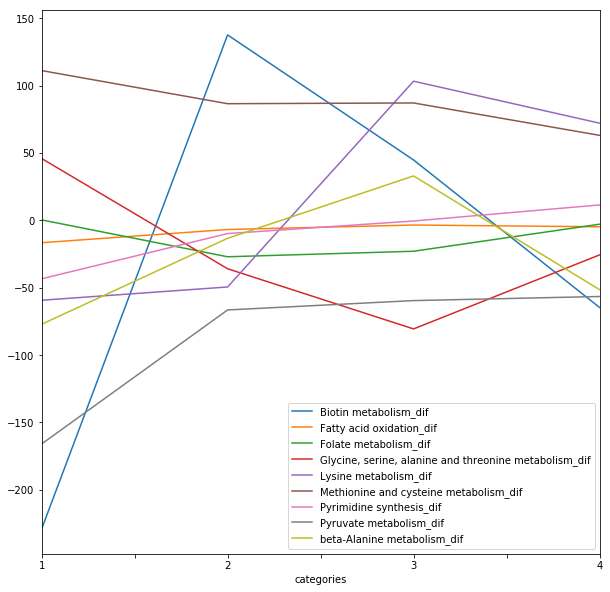

In [12]:
df_not_h[(df_not_h['p_val'] <= 0.05)][['1','2','3','4']].T.plot(kind='line', figsize=(10, 10))